In [464]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import binarize

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

cf.go_offline()
sns.set()

In [465]:
df = pd.read_csv('bcancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [467]:
df.columns = df.columns.str.replace(' ', '_')

# 0- Defining the label, and model target
make a model to find cancer the best, model turns positive (1) if it is cancer

In [468]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [469]:
# note that positive (value 1, or Yes) has way less numbers

In [470]:
# first make sure target or label is categorical: our target is 1 if paid, and 0 if not
df['target'] = df['diagnosis'].map({'B' : 0, 'M' : 1})
df.drop('diagnosis', axis = 1, inplace = True)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:_32,target
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [471]:
df = df.drop('Unnamed:_32', axis = 1)

# 4- Which features are important for this label?

## 4-a) for number features, we examin corr and p_value. if corr < some% and value > 0.05 with the label, we will drop it

In [472]:
# for correlation threshold value, it is a difficult decision, we better look at below corr graph and choose
# case by case which ones we want to remove.

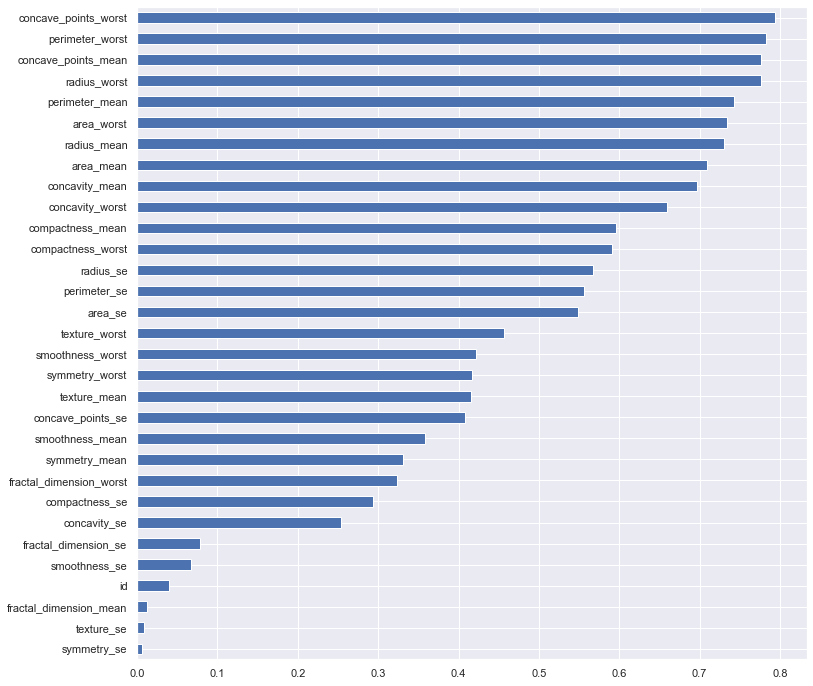

In [473]:
np.abs(df.corr()['target']).sort_values(ascending = True)[:-1].plot.barh(figsize = (12,12))

In [474]:
# let's drop 'symmetry_se', 'texture_se', 'fractal_dimension_mean'

In [475]:
np.abs(df.corr()['target']).sort_values(ascending = True)[:20].index

Index(['symmetry_se', 'texture_se', 'fractal_dimension_mean', 'id',
       'smoothness_se', 'fractal_dimension_se', 'concavity_se',
       'compactness_se', 'fractal_dimension_worst', 'symmetry_mean',
       'smoothness_mean', 'concave_points_se', 'texture_mean',
       'symmetry_worst', 'smoothness_worst', 'texture_worst', 'area_se',
       'perimeter_se', 'radius_se', 'compactness_worst'],
      dtype='object')

In [476]:
# now look at p_values
dfcopy = df.dropna()

In [477]:
ther = 0.05

In [478]:
col_list = []
p_list = []
for col in df.select_dtypes(['number']):
    slope, intercept, r_value, p_value, std_err = stats.linregress(dfcopy[col], dfcopy['target'])
    col_list.append(col)
    p_list.append(p_value)
    #print(f'{col} is associated with the target wtih p_value of:    {p_value}')

pval_table = pd.DataFrame(data = col_list, columns = ['col'])
pval_table['p_values'] = p_list
pval_table[pval_table['p_values'] > ther].sort_values(by = 'p_values', ascending = False)

# we gotta drop when p_value > 0.05

,col,p_values
19,symmetry_se,0.876642
12,texture_se,0.843332
10,fractal_dimension_mean,0.759937
0,id,0.343682
15,smoothness_se,0.110297
20,fractal_dimension_se,0.063074


In [479]:
df = df.drop(['symmetry_se', 'texture_se', 'fractal_dimension_mean', 'id', 'smoothness_se', 'fractal_dimension_se'], axis = 1)

In [480]:
df4 = df.copy()

# 8.5 Dimensionality reduction

In [481]:
# make a copy of the dataframe
dfcopy = df.drop('target', axis = 1)

## b) features with almost no variation to be deleted

In [482]:
ther = 1

In [483]:
# here we will drop columns that have relative_std_percent of below 1

cols_to_be_deleted = []
std_cols = []
for col in dfcopy.columns:
    std_col = 100 * (dfcopy[col].std()) / (dfcopy[col].mean())
    std_cols.append(std_col)
    if std_col < ther and col not in cols_to_be_deleted:
        cols_to_be_deleted.append(col)
    

df_std = pd.DataFrame(data = std_cols, index = dfcopy.columns, columns = ['var'])
df_std.sort_values(by = 'var')

,var
smoothness_mean,14.595358
symmetry_mean,15.132479
smoothness_worst,17.249129
symmetry_worst,21.328052
fractal_dimension_worst,21.515387
texture_mean,22.297118
texture_worst,23.936613
radius_mean,24.944971
perimeter_mean,26.420829
radius_worst,29.707943


In [484]:
cols_to_be_deleted

[]

## c) pairwise correlation

In [485]:
ther = 0.95

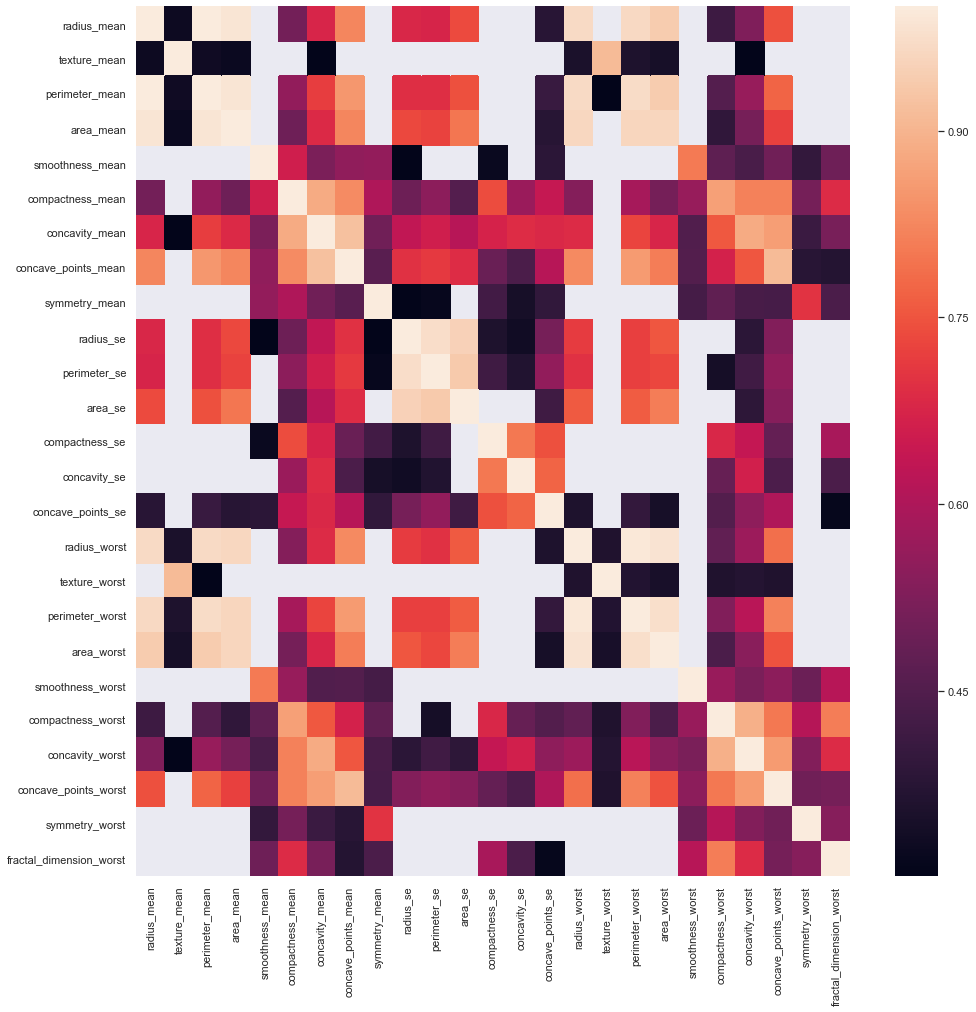

In [486]:
dfcorr = dfcopy.corr()
plt.figure(figsize = (16,16))
sns.heatmap(dfcorr[(dfcorr > 0.3) | (dfcorr < -0.3)])

In [487]:
# here if there is pairwise correlation above 0.75, we omit one of the columns to be added to the list
for i,col1 in enumerate(dfcorr.columns):
    for j, col2 in enumerate(dfcorr.columns):
        if j > i:
            corr_cell = dfcorr.loc[col1, col2]
            if corr_cell > ther and col2 not in cols_to_be_deleted:
                cols_to_be_deleted.append(col2)                

In [488]:
cols_to_be_deleted

['perimeter_mean',
 'area_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'perimeter_se',
 'area_se']

## d) multi-co-linearity
based on VIF calculation of higher than 5

In [489]:
ther = 5

In [490]:
# vif of more than 5 means multi-co-linearity
for i,col1 in enumerate(dfcorr.columns):
    for j, col2 in enumerate(dfcorr.columns):
        if j > i:
            slope, intercept, r_value, p_value, std_err = stats.linregress(df[col1], df[col2])
            vif = 1 / (1 - r_value * r_value)
            if vif > ther and col2 not in cols_to_be_deleted:
                cols_to_be_deleted.append(col2)             

In [491]:
cols_to_be_deleted

['perimeter_mean',
 'area_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'concave_points_mean',
 'concave_points_worst']

## e) Decision Tree feature importance

In [492]:
ther = 0.001

In [493]:
X = dfcopy
y = df['target']

In [494]:
# Create decision tree classifer object
clf = RandomForestClassifier()

# Train model
model = clf.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_

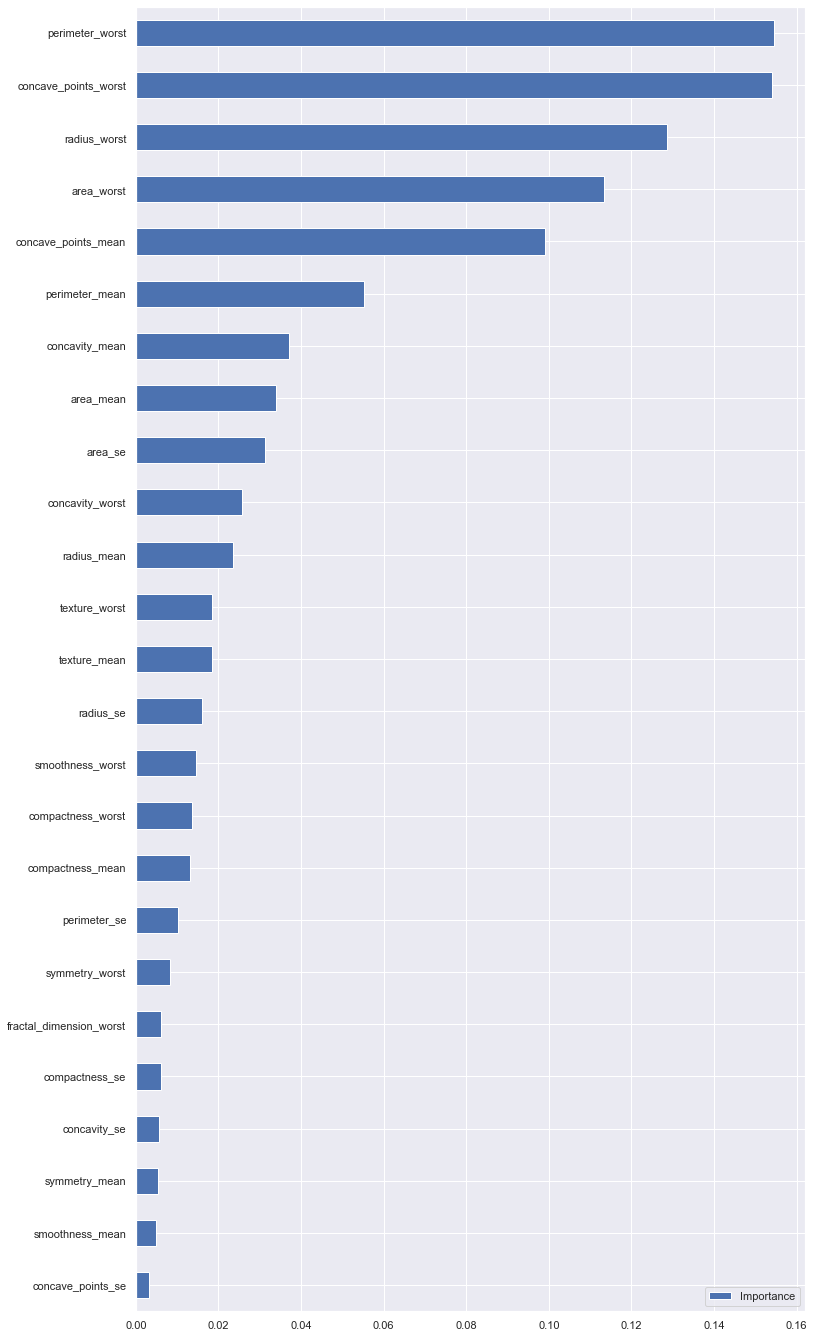

In [495]:
df_importance = pd.DataFrame(data = importances, index = dfcopy.columns, columns = ['Importance'])
df_importance.sort_values(by = 'Importance').plot.barh(figsize = (12,24))

In [496]:
df_importance.sort_values(by = 'Importance')

,Importance
concave_points_se,0.003310
smoothness_mean,0.004793
symmetry_mean,0.005281
concavity_se,0.005593
compactness_se,0.006017
fractal_dimension_worst,0.006118
symmetry_worst,0.008375
perimeter_se,0.010261
compactness_mean,0.013097
compactness_worst,0.013503


In [497]:
for ind in df_importance.index:
    imp = df_importance.loc[ind]['Importance']
    if imp < ther and ind not in cols_to_be_deleted:
        cols_to_be_deleted.append(ind)

In [498]:
cols_to_be_deleted

['perimeter_mean',
 'area_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'concave_points_mean',
 'concave_points_worst']

## f) based on P_values

In [499]:
col_list = []
p_list = []
for col in dfcopy.columns:
    slope, intercept, r_value, p_value, std_err = stats.linregress(X[col], y)
    col_list.append(col)
    p_list.append(p_value)
    if p_value > 0.05 and col not in cols_to_be_deleted:
        cols_to_be_deleted.append(col)
    
    
pval_table = pd.DataFrame(data = col_list, columns = ['col'])
pval_table['p_values'] = p_list
pval_table.sort_values(by = 'p_values', ascending = False)

# we love p_values of less than 0.05, since p_value is the probability that the feature is NOT important at all

,col,p_values
13,concavity_se,8.260176e-10
12,compactness_se,9.975995e-13
24,fractal_dimension_worst,2.316432e-15
8,symmetry_mean,5.733384e-16
4,smoothness_mean,1.051850e-18
14,concave_points_se,3.072309e-24
1,texture_mean,4.058636e-25
23,symmetry_worst,2.951121e-25
19,smoothness_worst,6.575144e-26
16,texture_worst,1.078057e-30


In [500]:
cols_to_be_deleted

['perimeter_mean',
 'area_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'concave_points_mean',
 'concave_points_worst']

In [501]:
df = df.drop(cols_to_be_deleted, axis = 1)

In [502]:
df.shape

(569, 16)

In [503]:
df85 = df.copy()

# 9- Train-Test split

In [504]:
# setting up x and y, the .values make it a numpy array to put into tf

x = df.drop('target', axis = 1)
y = df['target']

In [505]:
# split, first into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 101)

# then split the train one into test and valid, 0.1111 x 0.9 = 0.09999
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.11111111, random_state = 101)

In [506]:
x_train.shape, x_val.shape, x_test.shape

((455, 15), (57, 15), (57, 15))

# 11- Modeling

# <center> ANN

In [507]:
# here, a good model produces very good results in terms of accuracy, precision, recall, and f_1, so we take it
# too simple of a model so that its results are not that good, so we can see how things are affected in a fairly good model

x = df.drop('target', axis = 1).values
y = df['target'].values

# split, first into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 101)

# then split the train one into test and valid
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.11111111, random_state = 101)

## scaling must happen after test_train split to avoid data leakage

scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)

x_val = scalar.transform(x_val)

x_test = scalar.transform(x_test)

In [508]:
# making the layers

model = Sequential()
nnodes = 5
act_func = 'relu'

model.add(Dense(nnodes, activation = act_func))


model.add(Dense(1, activation = 'sigmoid'))  # binary classification last layer should be sigmoid

In [509]:
# compiling the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [510]:
# fitting the model

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 25, verbose = 1)

model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val),
          callbacks = [early_stop],
          batch_size = 32,
          epochs = 10, 
          verbose = 2)

Train on 455 samples, validate on 57 samples
Epoch 1/10
455/455 - 0s - loss: 0.7461 - val_loss: 0.7620
Epoch 2/10
455/455 - 0s - loss: 0.6737 - val_loss: 0.6897
Epoch 3/10
455/455 - 0s - loss: 0.6184 - val_loss: 0.6340
Epoch 4/10
455/455 - 0s - loss: 0.5739 - val_loss: 0.5890
Epoch 5/10
455/455 - 0s - loss: 0.5366 - val_loss: 0.5530
Epoch 6/10
455/455 - 0s - loss: 0.5041 - val_loss: 0.5230
Epoch 7/10
455/455 - 0s - loss: 0.4783 - val_loss: 0.4968
Epoch 8/10
455/455 - 0s - loss: 0.4559 - val_loss: 0.4752
Epoch 9/10
455/455 - 0s - loss: 0.4356 - val_loss: 0.4545
Epoch 10/10
455/455 - 0s - loss: 0.4175 - val_loss: 0.4364


In [511]:
loss_func = pd.DataFrame(data = model.history.history['loss'], columns = ['Model Loss'])
loss_func['Validation Loss'] =  model.history.history['val_loss']
loss_func.tail()

,Model Loss,Validation Loss
5,0.504097,0.522971
6,0.478308,0.496776
7,0.455942,0.475227
8,0.435589,0.454512
9,0.417532,0.436419


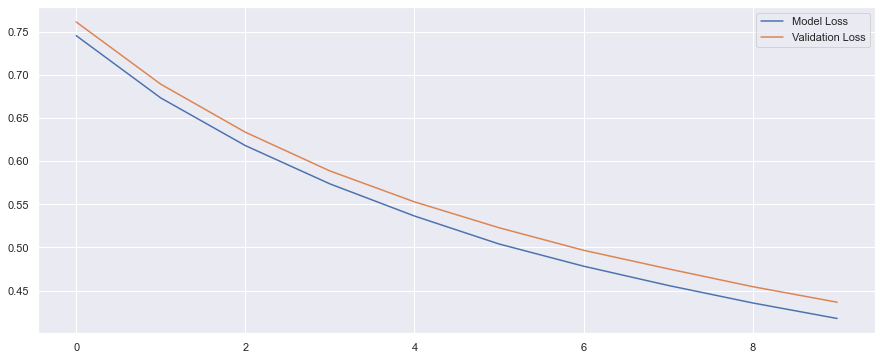

In [512]:
loss_func.plot(figsize = (15,6))

In [515]:
# see what thresold make it a better model in terms of accuracy, precision, recall, or f_1

y_test = y_test.reshape(-1,1)
what_start_accuracy = 0.0
what_start_precision = 0.0
what_start_recall = 0.0
what_start_f_1 = 0.0


for threshold in np.arange(0, 1.01, 0.01):

    real_preds = model.predict(x_test)

    for i in range(0, len(real_preds)):
        if real_preds[i] < threshold:
            real_preds[i] = 0
        else:
            real_preds[i] = 1
            
    rep = classification_report(y_test, real_preds, output_dict=True)
    class_1_accuracy = rep['accuracy']
    class_1_precision = rep['1']['precision']
    class_1_recall = rep['1']['recall']
    class_1_f_1 = rep['1']['f1-score']
    
    print(f'threshold of: {threshold:.3f} gives accuracy, precision, recall, and f_1 of: \
    {class_1_accuracy:.3f}, {class_1_precision:.3f}, {class_1_recall:.3f}, {class_1_f_1:.3f}' )

    if class_1_accuracy > what_start_accuracy:
        what_start_accuracy = class_1_accuracy
        best_threshold_accuracy = threshold
    if class_1_precision > what_start_precision:
        what_start_precision = class_1_precision
        best_threshold_precision = threshold
    if class_1_recall > what_start_recall:
        what_start_recall = class_1_recall
        best_threshold_recall = threshold
    if class_1_f_1 > what_start_f_1:
        what_start_f_1 = class_1_f_1
        best_threshold_f_1 = threshold
        

print('')
print('')
print('best threshold for model accuracy is: ', best_threshold_accuracy, 'and accuracy equal to: ', what_start_accuracy)
print('best threshold for model precision is: ', best_threshold_precision, 'and precision equal to: ', what_start_precision)
print('best threshold for model recall is: ', best_threshold_recall, 'and recall equal to: ', what_start_recall)
print('best threshold for model f_1 is: ', best_threshold_f_1, 'and f_1 equal to: ', what_start_f_1)

threshold of: 0.000 gives accuracy, precision, recall, and f_1 of:     0.386, 0.386, 1.000, 0.557
threshold of: 0.010 gives accuracy, precision, recall, and f_1 of:     0.386, 0.386, 1.000, 0.557
threshold of: 0.020 gives accuracy, precision, recall, and f_1 of:     0.386, 0.386, 1.000, 0.557
threshold of: 0.030 gives accuracy, precision, recall, and f_1 of:     0.386, 0.386, 1.000, 0.557
threshold of: 0.040 gives accuracy, precision, recall, and f_1 of:     0.421, 0.400, 1.000, 0.571
threshold of: 0.050 gives accuracy, precision, recall, and f_1 of:     0.474, 0.423, 1.000, 0.595
threshold of: 0.060 gives accuracy, precision, recall, and f_1 of:     0.509, 0.440, 1.000, 0.611
threshold of: 0.070 gives accuracy, precision, recall, and f_1 of:     0.509, 0.440, 1.000, 0.611
threshold of: 0.080 gives accuracy, precision, recall, and f_1 of:     0.526, 0.449, 1.000, 0.620
threshold of: 0.090 gives accuracy, precision, recall, and f_1 of:     0.544, 0.458, 1.000, 0.629
threshold of: 0.100 

threshold of: 0.830 gives accuracy, precision, recall, and f_1 of:     0.719, 1.000, 0.273, 0.429
threshold of: 0.840 gives accuracy, precision, recall, and f_1 of:     0.719, 1.000, 0.273, 0.429
threshold of: 0.850 gives accuracy, precision, recall, and f_1 of:     0.702, 1.000, 0.227, 0.370
threshold of: 0.860 gives accuracy, precision, recall, and f_1 of:     0.684, 1.000, 0.182, 0.308
threshold of: 0.870 gives accuracy, precision, recall, and f_1 of:     0.684, 1.000, 0.182, 0.308
threshold of: 0.880 gives accuracy, precision, recall, and f_1 of:     0.684, 1.000, 0.182, 0.308
threshold of: 0.890 gives accuracy, precision, recall, and f_1 of:     0.684, 1.000, 0.182, 0.308
threshold of: 0.900 gives accuracy, precision, recall, and f_1 of:     0.649, 1.000, 0.091, 0.167
threshold of: 0.910 gives accuracy, precision, recall, and f_1 of:     0.649, 1.000, 0.091, 0.167
threshold of: 0.920 gives accuracy, precision, recall, and f_1 of:     0.649, 1.000, 0.091, 0.167
threshold of: 0.930 

In [516]:
# lets choose best f_1 score threshold

real_preds = model.predict(x_test)

for i in range(0, len(real_preds)):
    if real_preds[i] < 0.4:
        real_preds[i] = 0
    else:
        real_preds[i] = 1
        

predictions = pd.DataFrame(data = real_preds, columns = ['Predicted Values'])
predictions['Real Values'] = y_test
predictions.head()

,Predicted Values,Real Values
0,0.0,0
1,0.0,0
2,0.0,0
3,1.0,1
4,0.0,0


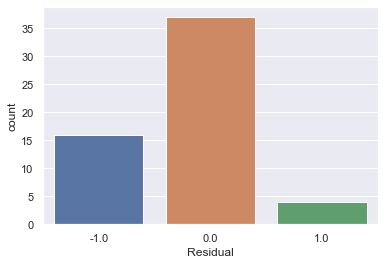

In [517]:
# residual making

predictions['Residual'] = predictions['Real Values'] - predictions['Predicted Values']
sns.countplot(predictions['Residual'])

In [518]:
print(classification_report(y_test, real_preds))

              precision    recall  f1-score   support

           0       0.83      0.54      0.66        35
           1       0.53      0.82      0.64        22

    accuracy                           0.65        57
   macro avg       0.68      0.68      0.65        57
weighted avg       0.71      0.65      0.65        57



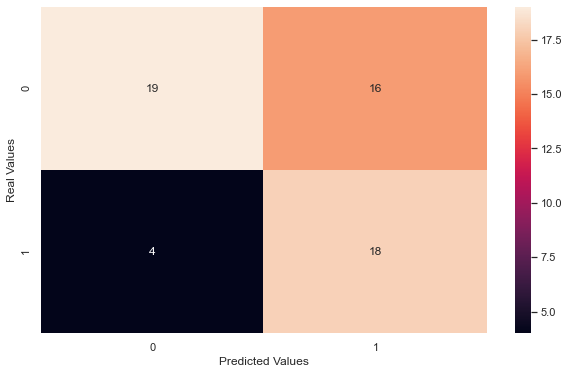

In [519]:
my_cm = confusion_matrix(y_test, predictions['Predicted Values'])
plt.figure(figsize = (10,6))
sns.heatmap(my_cm, annot = True);
plt.xlabel('Predicted Values');
plt.ylabel('Real Values');

In [520]:
cr = classification_report(y_test, predictions['Predicted Values'], output_dict=True)
class_1_accuracy = 100 * cr['accuracy']
class_1_precision = 100 * cr['1']['precision']
class_1_recall = 100 * cr['1']['recall']
class_1_f_1 = 100 * cr['1']['f1-score']

print(f'Model Accuracy is :   {class_1_accuracy:.2f}%')
print(f'Model Precision is:   {class_1_precision:.2f}%')
print(f'Model Recall i   s:   {class_1_recall:.2f}%')
print(f'Model F_1_Score is:   {class_1_f_1:.2f}%')

Model Accuracy is :   64.91%
Model Precision is:   52.94%
Model Recall i   s:   81.82%
Model F_1_Score is:   64.29%
